In [ ]:
pip install --upgrade tensorflow jax

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Load the training dataset
train_data = pd.read_csv("/sign_mnist_train.csv")

# Load the testing dataset
test_data = pd.read_csv("/sign_mnist_test.csv")

# Separate features (pixels) and labels for training data
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

# Separate features (pixels) and labels for testing data
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Reshape feature data into 28x28 images for both training and testing data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize pixel values to be between 0 and 1 for both training and testing data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(26, activation='softmax')  # 26 output classes (A-Z)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

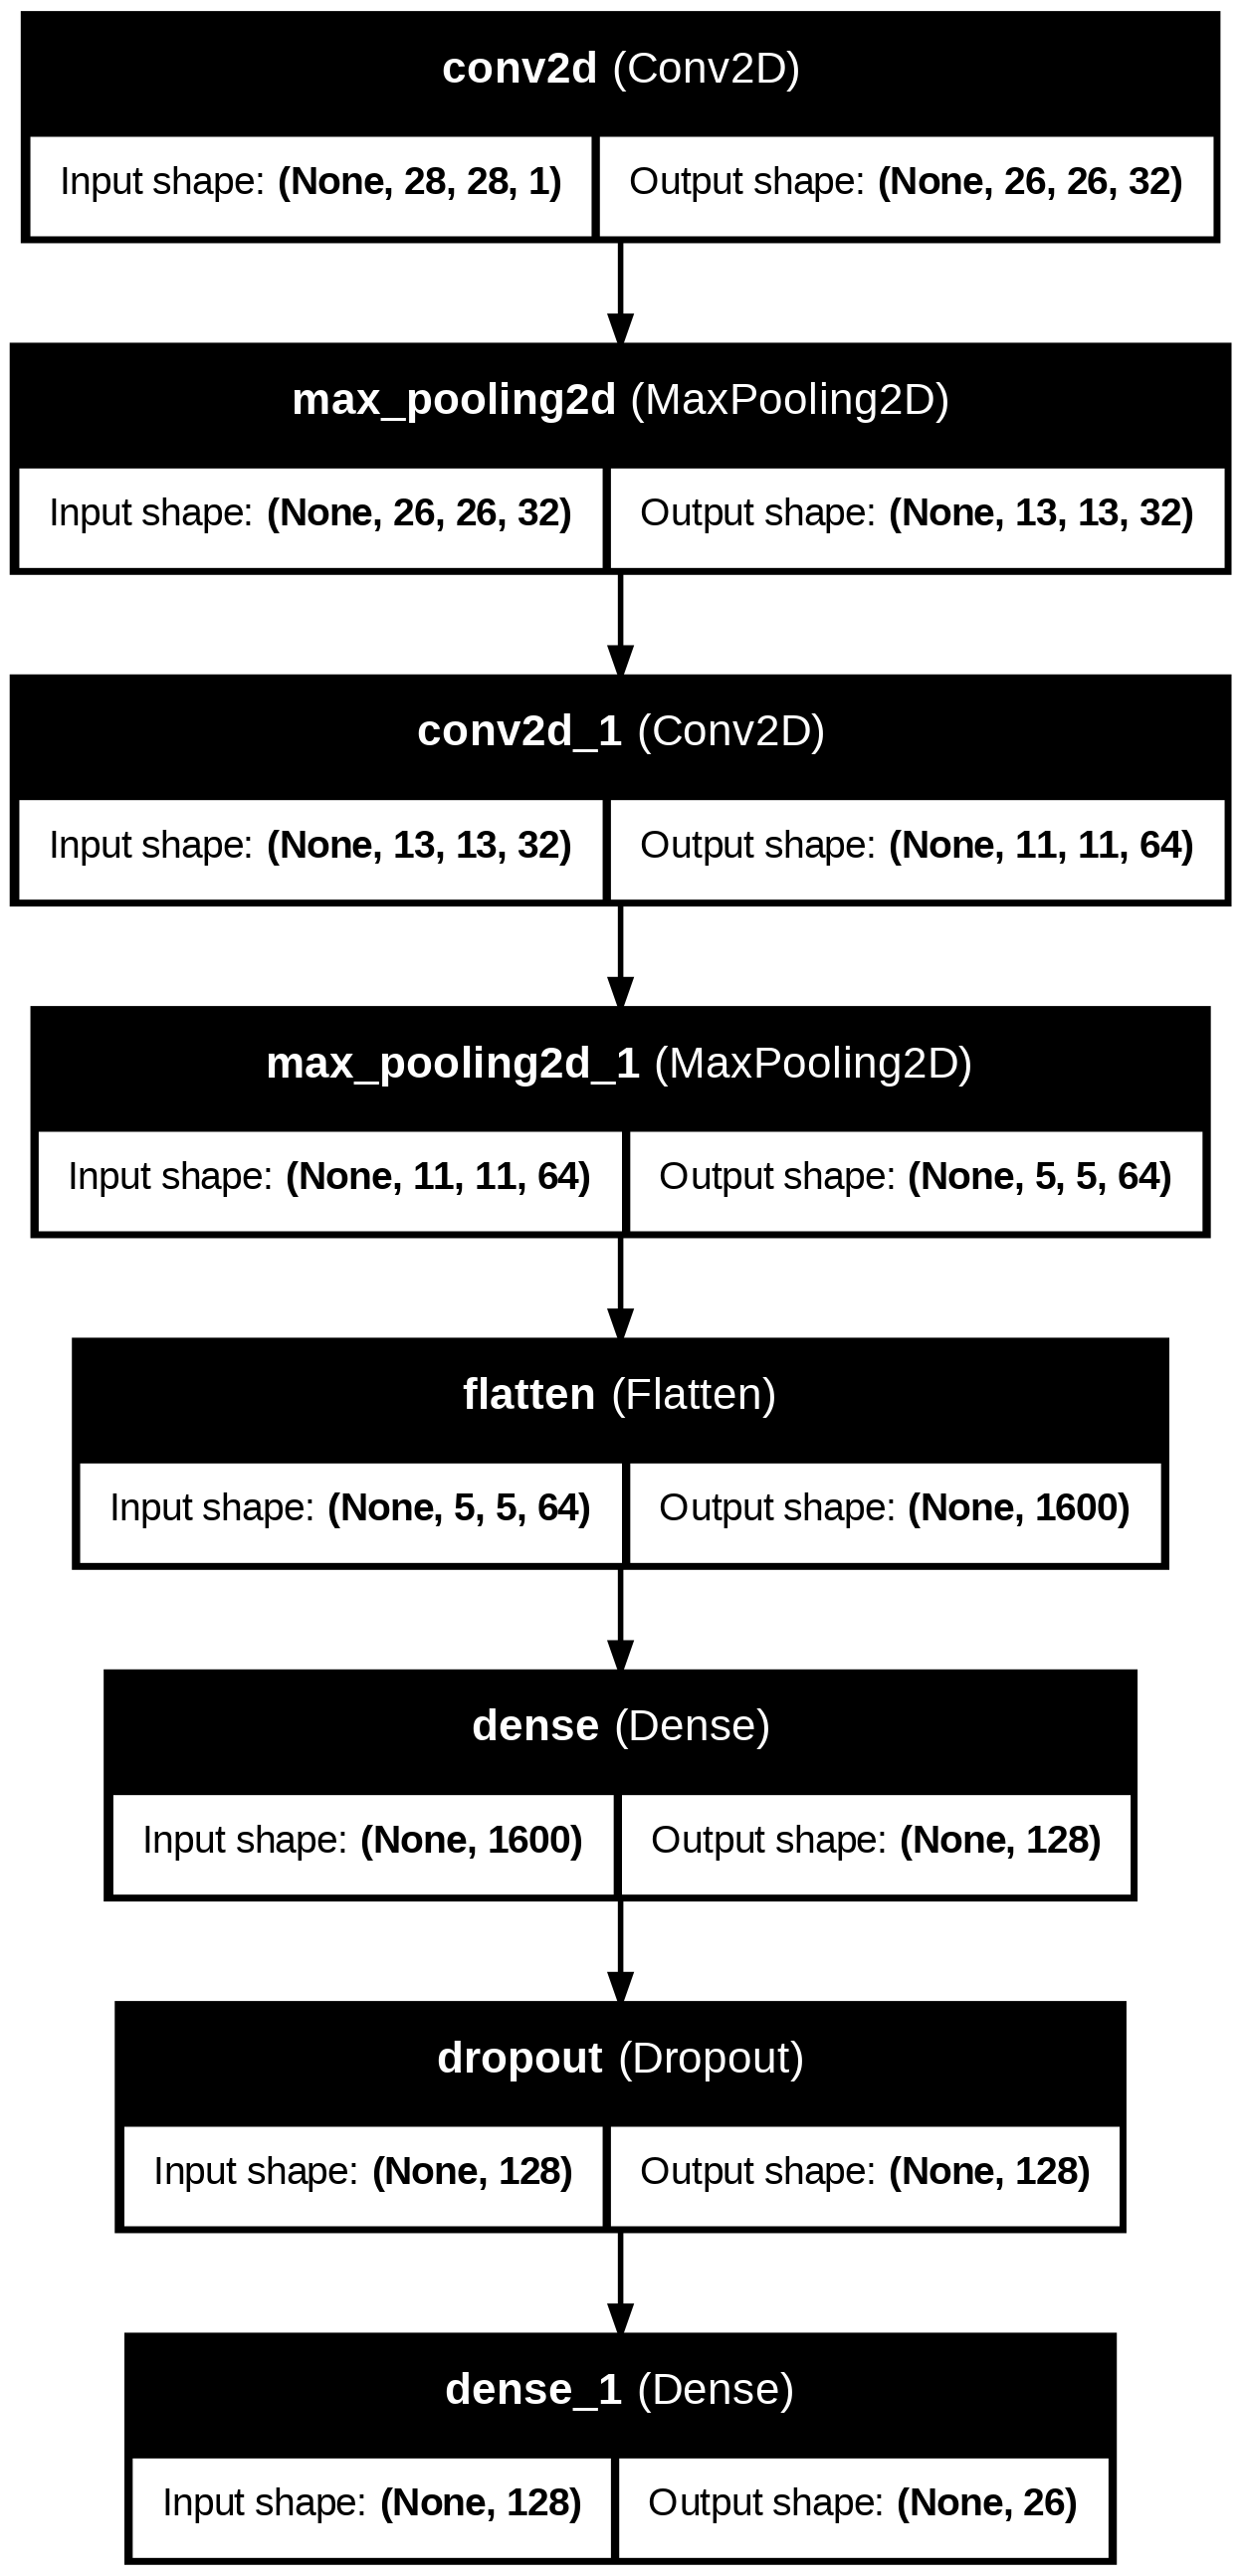

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.3689 - loss: 2.1025 - val_accuracy: 0.9434 - val_loss: 0.2424
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9034 - loss: 0.3012 - val_accuracy: 0.9944 - val_loss: 0.0415
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.9705 - loss: 0.1013 - val_accuracy: 0.9991 - val_loss: 0.0155
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.9829 - loss: 0.0602 - val_accuracy: 0.9998 - val_loss: 0.0055
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.9897 - loss: 0.0353 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9915 - loss: 0.0292 - val_accuracy: 0.9998 - val_loss: 0.0043
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9919 - loss: 0.0280 - val_accuracy: 0.9985 - val_loss: 0.0088
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9948 - loss: 0.0187 - 

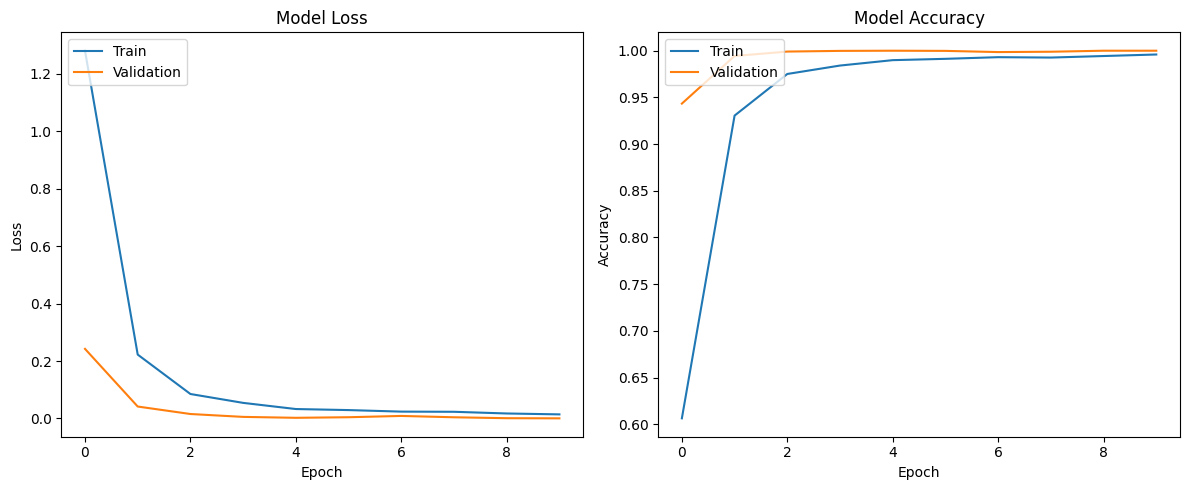

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Plotting loss and accuracy over epochs
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()